In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wikipediaapi

# Load the cleaned data
trend_data_df = pd.read_csv('dataset\Cleaned_Trend_Data.csv')
schemes_data_df = pd.read_csv('dataset\Merged_Schemes_Data.csv')

# Initialize Wikipedia API with a proper User-Agent
wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent="Ritvik/1.0 (ritvik2403@gmail.com)"
)


In [128]:
# Step 1: Take Input from User and Define `category`
def get_category_input_and_define():
    category_name = input("Enter the healthcare category name (e.g., Pregnancy): ").strip()
    
    # Validate `Category Name`
    if category_name not in trend_data_df['Category Name'].unique():
        print("Invalid category name. Please enter a valid category name.")
        return None, None
    
    # Derive `Category` from `Category Name`
    category_row = trend_data_df[trend_data_df['Category Name'] == category_name].iloc[0]
    category = category_row['Category']
    
    return category_name, category

In [129]:
# Step 2: Trend Analysis with Graph Including `Category Name`
def trend_analysis_with_graph(category_name):
    category_data = trend_data_df[trend_data_df['Category Name'] == category_name]
    if category_data.empty:
        print(f"No trend data available for the category name '{category_name}'.")
        return

    # Group data by date for trend analysis
    category_trend = category_data.groupby('Date')['Patient Count'].sum().reset_index()

    # Plot trend analysis graph
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Patient Count', data=category_trend)
    plt.title(f'Trend Analysis for {category_name}')
    plt.xlabel('Date')
    plt.ylabel('Patient Count')
    plt.xticks(rotation=45)
    plt.show()

In [130]:
#def retrieve_schemes_for_category(category):
 #   schemes_data = schemes_data_df[schemes_data_df['Category'] == category]
  #  print(f"Existing schemes for {category}:")
   # print(schemes_data[['Scheme Name', 'Benefits', 'Flaws', 'Level']])


In [131]:
# Step 3: Retrieve Existing Schemes by `Category`
def retrieve_schemes_for_category(category):
    schemes_for_category = schemes_data_df[schemes_data_df['Category'] == category]
    if schemes_for_category.empty:
        print(f"No existing schemes found for category '{category}'.")
    else:
        print(f"Existing schemes for category '{category}':")
        count = 0
        for i, (_, scheme) in enumerate(schemes_for_category.iterrows()):
            if i == 10:
                break # Stop after 10 iterations
            count += 1
            print("\n", count)
            #print(schemes_data_df[['Scheme Name', 'Benefits', 'Flaws', 'Level']])
            print(f"Scheme Name: {scheme['Scheme Name']}")
            print(f"Description: {scheme['Description']}")
            print(f"Benefits: {scheme['Benefits']}")
            print(f"Flaws: {scheme['Flaws']}")
            print(f"Level: {scheme['Level']}")

In [132]:
# Step 3.1: Search for Scheme-Related Info on Wikipedia
def fetch_scheme_info_from_wikipedia():
    scheme_name = input("Enter the scheme name you want to search on Wikipedia: ").strip()
    page = wiki.page(scheme_name)
    if page.exists():
        print(f"\nWikipedia Summary for '{scheme_name}':")
        print(page.summary[:500])  # Display first 500 characters
    else:
        print(f"No Wikipedia page found for '{scheme_name}'.")

In [133]:
# Step 4: Generate New Scheme Suggestion with Advanced Logic
def generate_advanced_scheme_suggestion(category_name):
    category_data = trend_data_df[trend_data_df['Category Name'] == category_name]
    if category_data.empty:
        print(f"No data available to generate a scheme for '{category_name}'.")
        return

    # Trend direction detection: Calculate trend slopes
    category_trend = category_data.groupby('Date')['Normalized Patient Count'].sum().reset_index()
    category_trend['Date'] = pd.to_datetime(category_trend['Date'])
    category_trend['Trend_Slope'] = category_trend['Normalized Patient Count'].diff()

    # Detect periods of high growth or anomalies
    growth_periods = category_trend[category_trend['Trend_Slope'] > category_trend['Trend_Slope'].mean() + 2 * category_trend['Trend_Slope'].std()]
    anomaly_periods = category_trend[category_trend['Normalized Patient Count'] > category_trend['Normalized Patient Count'].mean() + 3 * category_trend['Normalized Patient Count'].std()]

    # Analyze patient demographics
    subcategory_data = trend_data_df[trend_data_df['Category Name'] == category_name].groupby('Data Name')['Patient Count'].sum().reset_index()
    highest_subcategory = subcategory_data.loc[subcategory_data['Patient Count'].idxmax()]['Data Name']

    # Advanced logic for scheme recommendation
    suggestion = f"Analysis for '{category_name}':\n"

    if not growth_periods.empty:
        suggestion += "- Significant growth detected in recent periods. Consider expanding resources during these months.\n"

    if not anomaly_periods.empty:
        suggestion += "- Anomalous increases in patient count detected. Investigate possible reasons, such as epidemics or policy changes.\n"

    suggestion += f"- The subcategory with the highest patient count is '{highest_subcategory}'. Tailor schemes to address this specific group.\n"

    # Add normalization insights
    avg_patient_count = category_data['Normalized Patient Count'].mean()
    if avg_patient_count > 0.7:
        suggestion += "- Overall patient count is high compared to other categories. Recommend nationwide outreach programs.\n"
    else:
        suggestion += "- Patient count is moderate. Focus on targeted improvements in underserved areas.\n"

    print(suggestion)


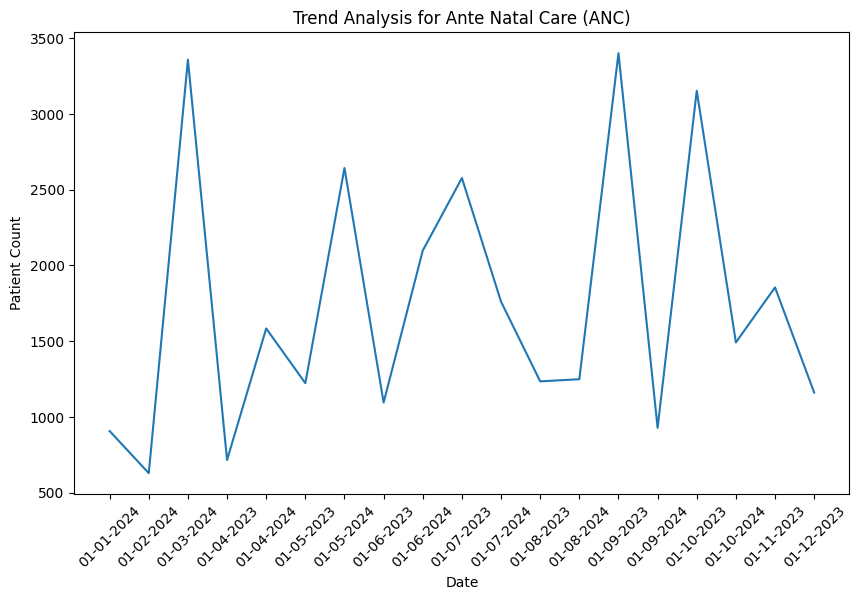

Existing schemes for category 'M1':

 1
Scheme Name: Janani Suraksha Yojana (JSY)
Description: promotes institutional deliveries among poor pregnant women
Benefits: reduces maternal and neonatal mortality
Flaws: challenges in quality of care and gaps in remote areas
Level: National

 2
Scheme Name: Pradhan Mantri Surakshit Matritva Abhiyan (PMSMA)
Description: ensures at least one anc checkup by specialists during the 2nd or 3rd trimester
Benefits: improves maternal and fetal health through specialized care
Flaws: lack of follow up care in remote regions
Level: National

 3
Scheme Name: Janani Shishu Suraksha Karyakram (JSSK)
Description: provides free anc services in government facilities
Benefits: eliminates financial barriers for mothers seeking antenatal care
Flaws: implementation challenges due to logistical issues
Level: National

 4
Scheme Name: LaQshya
Description: focuses on improving quality in labor rooms and maternity operation theaters
Benefits: ensures safer childbirth pr

In [134]:
# Main Function to Run the RAG Model
def run_rag_model():
    try:
        # Step 1: Get user input and define variables
        category_name, category = get_category_input_and_define()
        if not category or not category_name:
            return

        # Step 2: Perform trend analysis
        trend_analysis_with_graph(category_name)

        # Step 3: Retrieve existing schemes
        retrieve_schemes_for_category(category)

        # Step 3.1: Optionally, search for a specific scheme on Wikipedia
        search_choice = input("Do you want to search for a specific scheme on Wikipedia? (yes/no): ").strip().lower()
        if search_choice == 'yes':
            fetch_scheme_info_from_wikipedia()

        # Step 4: Generate a new scheme suggestion with advanced logic
        generate_advanced_scheme_suggestion(category_name)

    except Exception as e:
        print(f"An error occurred: {e}")

# Run the RAG Model
run_rag_model()
